In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color=sns.color_palette()
sns.set_style('darkgrid')
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from scipy.special import boxcox1p
from scipy import stats
from scipy.stats import uniform,randint
import re
from scipy.stats import norm,skew,normaltest
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb



import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#Read the datafile
testfile =r'/gdrive/My Drive/KAEMH/newyear_newyou/Predictionset.csv'
test_data=pd.read_csv(testfile,sep=',',index_col=0)

In [0]:
def display_all(df):

    """display the datafile at once.""" 
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [0]:
display_all(test_data)
test_data['TARGET'].value_counts()

,Alumni_Id,Age,Gender.M,Local,Pref.Class.Year,Ethnic.Desc,Ethnic.DescAmerican.Indian.Alaska.Native,Ethnic.DescAsian,Ethnic.DescBlack,Ethnic.DescHispanic,Ethnic.DescNative.Hawaiian.Other.Pacific.Islander,Ethnic.DescRace.and.Ethnicity.Unknown,Ethnic.DescTwo.or.More.Races,Record.Type.DescAlumnus.a..Non.Degreed,Record.Type.DescAlumnus.a..Thunderbird,Record.Type.DescASU.Affiliate,Record.Type.DescASUF.Board.Member,Record.Type.DescCorporate.Foundation,Record.Type.DescCorporation,Record.Type.DescDonor.Advised.Fund,Record.Type.DescEstate,Record.Type.DescEstate.of.Alumnus.a,Record.Type.DescEstate.of.Thunderbird.Alumus.a,Record.Type.DescFaculty.Staff,Record.Type.DescFoundation,Record.Type.DescFundraising.Consortium,Record.Type.DescGovernment.Organization,Record.Type.DescOther.Individual,Record.Type.DescOther.Organization,Record.Type.DescParent,Record.Type.DescPast.Faculty.Staff,Record.Type.DescPast.Faculty.Staff.Thunderbird,Record.Type.DescPast.Parent,Record.Type.DescPersonal.or.Family.Foundation,Record.Type.DescReligious.Organization,Record.Type.DescStudent,Record.Type.DescTrust,Affiliated,Affil.Code.DescAA.All.Sts.Cath.Newman.Cntr.Chaptr,Affil.Code.DescAA.Alumni.Ambassadors,Affil.Code.DescAA.Alumni.Recruiters,Affil.Code.DescAA.Career.Connections.Panel,Affil.Code.DescAA.Career.Information.Network,Affil.Code.DescAA.Class.Gift.Golden.Reunion.Society,Affil.Code.DescAA.Football.Tickets.Mbr.Discount,Affil.Code.DescAA.Sparky.License.Plate,Affil.Code.DescAA.Starbucks.CAP,Affil.Code.DescAA.SunDevils..Advocacy.Network,Affil.Code.DescAA.US.Military.Veteran,Affil.Code.DescAZ.House.of.Representatives,Affil.Code.DescCOL.AWLHJO.Gen.,Affil.Code.DescFD.Hispanic.Community.Partnership,Affil.Code.DescFlinn.Brown.Civic.Leadership.Academy,Affil.Code.DescFriends.of.Arizona.PBS,Affil.Code.DescMurphy.s.Girls,Affil.Code.DescOther,Affil.Code.DescPhoenix.Community.Alliance..Inc.,Affil.Code.DescPresidential.Holiday.Card.Dec..2007,MemberCurrent.Member,MemberPast.Member,Member.LevelGold,Member.LevelMaroon,Member.LevelSparky,Total.Event.Fees.Paid,Activity.Participation.DescCancel,Activity.Participation.DescDeclined,Activity.Participation.DescDeclined.Out.of.Town,Activity.Participation.DescInvited,Activity.Participation.DescNo.Show,Activity.Participation.DescRegistered,User.Group.Desc,User.Group.DescASU.Enterprise.Marketing.Hub,User.Group.DescCollege...Barrett..The.Honors.College,User.Group.DescCollege...Sandra.Day.O.Connor.College.of.Law,User.Group.DescCollege.of.Health.Solutions,User.Group.DescCollege.of.Liberal.Arts...Sciences,User.Group.DescCollege.of.Nursing...Healthcare.Innovtn,User.Group.DescFDN.Communications...Marketing,User.Group.DescFDN.Gift.Processing,User.Group.DescFDN.IRM,User.Group.DescFDN.PCEP,User.Group.DescFDN.President,User.Group.DescFDN.President.s.Club.Women...Philanthropy,User.Group.DescFDN.Public.Events,User.Group.DescFDN.SDFA,User.Group.DescOther,User.Group.DescUniversity.Public.Affairs,User.Group.DescZ..CONVERSION,User.Group.DescZ..FDN.Affinity,User.Group.DescZ..FDN.Women...Philanthropy,User.Group.DescZ..Foundation,CoursePerf,NUM_UNDERGRAD_DEGREES,NUM_GRAD_DEGREES,NUM_LAW_DEGREES,ACADCAREERLENGTH,TOTALSTUDENTWORKERHRS,AVGSTUDENTWORKERHRSDAILY,NUMDAYSWORKED,SWDURATION,SWHRDENSITY,NUMADVAPPOINTMENTS,ADVISINGSPANDAYS,AVGFEDNEED,AVGLOANAMOUNT,AVGSCHOLARSHIPAMOUNT,AVGGRANTAMOUNT,AVGWAIVERAMOUNT,AVGWORKSTUDYAMOUNT,AVGTOTALAID,TOTALFEDERALSTUDENTDEBT,RESEARCH_CREDITS,INTERNSHIP_CREDITS,MAX_CLASSES_WITH_ONE_INSTRUCT,AVG_CLASS_SIZE,NUM_SMALL_CLASSES,MAXDISTANCE,AVGCOMMUTE,TEMPE_CREDITS,ICOURSE_CREDITS,ONLINE_CREDITS,WEST_CREDITS,POLY_CREDITS,DTPHX_CREDITS,TBIRD_CREDITS,TOT_CREDITS,MATHSCORE,VERBSCORE,SAT_MATH,SAT_VERB,ACT_MATH,ACT_ENGL,ACT_READ,AVGPERCFTE,TOTCREDITWITHDRAW,TOTCREDITFAILED,AGEFIRSTADMIT,AGELASTADMIT,AVG_DEW_PROP,AVG_DE_PROP,AVG_W_PROP,AVG_COURSE_GRADE,BARRETT_PROP,NON_US_CITZN_FLG,StudentWorker,IQ,COLLEGE_SHORT_DESCR,COLLEGE_SHORT_DESCRArts,COLLEGE_SHORT_DESCRBusiness,COLLEGE_SHORT_DESCRBusiness.Global.Management,COLLEGE_SHORT_DESCRDesi

0.0    494333
1.0       143
Name: TARGET, dtype: int64

In [0]:
test_data.isnull().sum().sum()


0

In [0]:
test_data.dtypes

Alumni_Id          float64
Age                float64
Gender.M             int64
Local                int64
Pref.Class.Year    float64
                    ...   
ClickRate          float64
ClickAllRate       float64
Segment             object
SecondSegment       object
TARGET             float64
Length: 673, dtype: object

In [0]:
test_data.iloc[:,0:-3].astype(float)

,Alumni_Id,Age,Gender.M,Local,Pref.Class.Year,Ethnic.Desc,Ethnic.DescAmerican.Indian.Alaska.Native,Ethnic.DescAsian,Ethnic.DescBlack,Ethnic.DescHispanic,Ethnic.DescNative.Hawaiian.Other.Pacific.Islander,Ethnic.DescRace.and.Ethnicity.Unknown,Ethnic.DescTwo.or.More.Races,Record.Type.DescAlumnus.a..Non.Degreed,Record.Type.DescAlumnus.a..Thunderbird,Record.Type.DescASU.Affiliate,Record.Type.DescASUF.Board.Member,Record.Type.DescCorporate.Foundation,Record.Type.DescCorporation,Record.Type.DescDonor.Advised.Fund,Record.Type.DescEstate,Record.Type.DescEstate.of.Alumnus.a,Record.Type.DescEstate.of.Thunderbird.Alumus.a,Record.Type.DescFaculty.Staff,Record.Type.DescFoundation,Record.Type.DescFundraising.Consortium,Record.Type.DescGovernment.Organization,Record.Type.DescOther.Individual,Record.Type.DescOther.Organization,Record.Type.DescParent,Record.Type.DescPast.Faculty.Staff,Record.Type.DescPast.Faculty.Staff.Thunderbird,Record.Type.DescPast.Parent,Record.Type.DescPersonal.or.Family.Foundation,Record.Type.DescReligious.Organization,Record.Type.DescStudent,Record.Type.DescTrust,Affiliated,Affil.Code.DescAA.All.Sts.Cath.Newman.Cntr.Chaptr,Affil.Code.DescAA.Alumni.Ambassadors,...,Alumni.AllUnsubs,Alumni.AnyUnsubs,ASUNow.NumSent,ASUNow.NumOpens,ASUNow.NumClicks,ASUNow.AllUnsubs,ASUNow.AnyUnsubs,Athletics.NumSent,Athletics.NumOpens,Athletics.NumClicks,Athletics.AllUnsubs,Athletics.AnyUnsubs,Foundation.NumSent,Foundation.NumOpens,Foundation.NumClicks,Foundation.AllUnsubs,Foundation.AnyUnsubs,Hub.NumSent,Hub.NumOpens,Hub.NumClicks,Hub.AllUnsubs,Hub.AnyUnsubs,Alumni.PrctOpen,Alumni.PrctClicks,Alumni.PrctClicksAll,ASUNow.PrctOpen,ASUNow.PrctClicks,ASUNow.PrctClicksAll,Athletics.PrctOpen,Athletics.PrctClicks,Athletics.PrctClicksAll,Foundation.PrctOpen,Foundation.PrctClicks,Foundation.PrctClicksAll,Hub.PrctOpen,Hub.PrctClicks,Hub.PrctClicksAll,OpenRate,ClickRate,ClickAllRate
0,7897.0,85.000000,1.0,0.0,1958.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7898.0,74.000000,0.0,0.0,1978.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7899.0,66.000000,0.0,0.0,1978.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7900.0,63.000000,0.0,0.0,1978.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7901.0,62.000000,1.0,0.0,1978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494471,1782170.0,50.000000,0.0,0.0,2019.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [0]:
k2,p=normaltest(test_data.iloc[:,0:-3])

print(p)

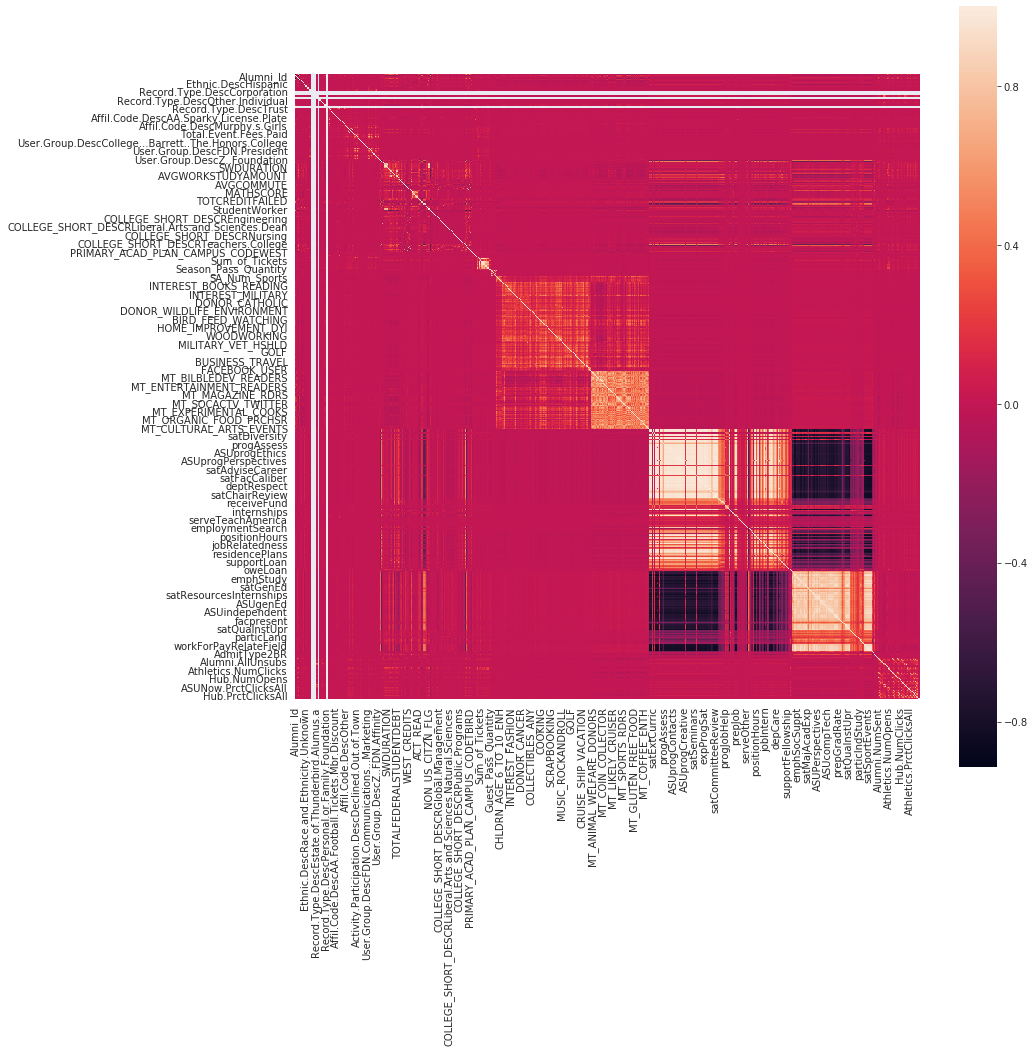

In [0]:
#find out the corelation matrix

corelation=test_data.corr()

plt.subplots(figsize=(14,14))
sns.heatmap(corelation, vmax=1.0, square=True)

In [0]:
categorical_columns=test_data.columns[test_data.dtypes==object].tolist()
numerical_columns=test_data.columns[test_data.dtypes!=object].tolist()


In [0]:
print(categorical_columns)


['Segment', 'SecondSegment']


In [0]:
data=test_data.iloc[:,:-1]
data.shape

(494476, 672)

In [0]:
#ONEhotEncoding

onehotencoded=pd.get_dummies(data,columns=categorical_columns)


In [0]:
onehotencoded.shape


(494476, 679)

In [0]:
def identify_constant_features(dataframe):
    count_uniques = dataframe.apply(lambda x: len(x.unique()))
    constants = count_uniques[count_uniques == 1].index.tolist()
    return constants

constant_features_test = set(identify_constant_features(onehotencoded))

print('There were {} constant features in test dataset.'.format(
        len(constant_features_test)))
print(constant_features_test)

There were 17 constant features in test dataset.
{'Record.Type.DescFoundation', 'AdmitType', 'Record.Type.DescOther.Organization', 'Record.Type.DescEstate', 'Record.Type.DescAlumnus.a..Non.Degreed', 'Record.Type.DescCorporate.Foundation', 'Record.Type.DescDonor.Advised.Fund', 'Record.Type.DescReligious.Organization', 'Record.Type.DescStudent', 'Record.Type.DescEstate.of.Alumnus.a', 'Record.Type.DescFundraising.Consortium', 'Record.Type.DescASU.Affiliate', 'Record.Type.DescPersonal.or.Family.Foundation', 'Record.Type.DescEstate.of.Thunderbird.Alumus.a', 'Record.Type.DescGovernment.Organization', 'IQ', 'Record.Type.DescCorporation'}


In [0]:
# Drop the constant features

onehotencoded.drop(constant_features_test, inplace=True, axis=1)


In [0]:
test_data.shape

(494476, 673)

In [0]:
#splitting the test_data in x and y for train_test_split

x=onehotencoded.iloc[:,:-1]
y=test_data.iloc[:,-1]


x_train, x_test, y_train, y_test =train_test_split(x.values, y.values, random_state=5, test_size=0.4)


In [0]:
dataset_allfeatures=pd.concat([x,y],axis=1,sort=False)
print(dataset_allfeatures.shape)

dataset_allfeatures["TARGET"].value_counts()


(494476, 679)


0.0    494333
1.0       143
Name: TARGET, dtype: int64

In [0]:
dataset_allfeatures.to_csv('/gdrive/My Drive/KAEMH/newyear_newyou/dataset_allfeatures.csv')

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(296685, 678)
(296685,)
(197791, 678)
(197791,)


In [0]:
#randomforest classifer

random_tree=RandomForestClassifier(n_estimators=300,max_depth=50)

random_tree.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_predict=pd.DataFrame(random_tree.predict(x_train),columns=["TARGET"])

rf_predict.TARGET.value_counts()

print(classification_report(y_train,rf_predict))
print(confusion_matrix(y_train,rf_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    296594
         1.0       0.96      0.80      0.87        91

    accuracy                           1.00    296685
   macro avg       0.98      0.90      0.94    296685
weighted avg       1.00      1.00      1.00    296685

[[296591      3]
 [    18     73]]


In [0]:
#prediction(Random forest)

rf_predict=pd.DataFrame(random_tree.predict(x_test),columns=['TARGET'])
print(classification_report(y_test,rf_predict))

print(confusion_matrix(y_test,rf_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    197739
         1.0       0.74      0.27      0.39        52

    accuracy                           1.00    197791
   macro avg       0.87      0.63      0.70    197791
weighted avg       1.00      1.00      1.00    197791

[[197734      5]
 [    38     14]]
